In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Course/研一上/深度學習之於生醫/final presentation/GeodisTK-master

/content/drive/MyDrive/Course/研一上/深度學習之於生醫/final presentation/GeodisTK-master


In [3]:
!pip install GeodisTK

  Preparing metadata (setup.py) ... done
  Created wheel for GeodisTK: filename=GeodisTK-0.1.7-cp310-cp310-linux_x86_64.whl size=186878 sha256=7205b770b6cdd75842d612377b8f50e51457c251ea201778de16dc94a100beae
  Stored in directory: /root/.cache/pip/wheels/f2/12/43/7a79927d541a85dc3fe26c3a0e718a01c4e0074855bf9c8941
Successfully built GeodisTK


## python demo2d.py

example list
 0 -- example for gray scale image
runtime(s) of fast marching 0.03982210159301758
runtime(s) of raster  scan  0.042815446853637695


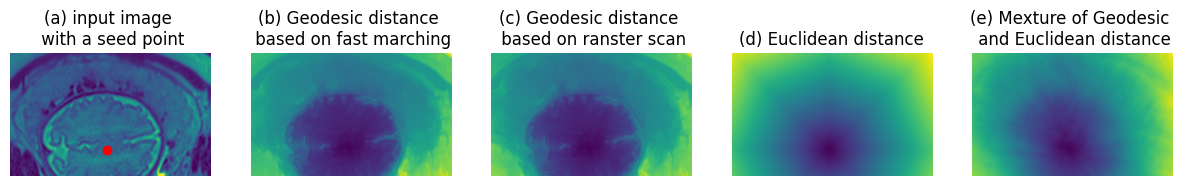

 1 -- example for RB image
runtime(s) of fast marching 0.14467978477478027
runtime(s) of raster  scan  0.11252737045288086


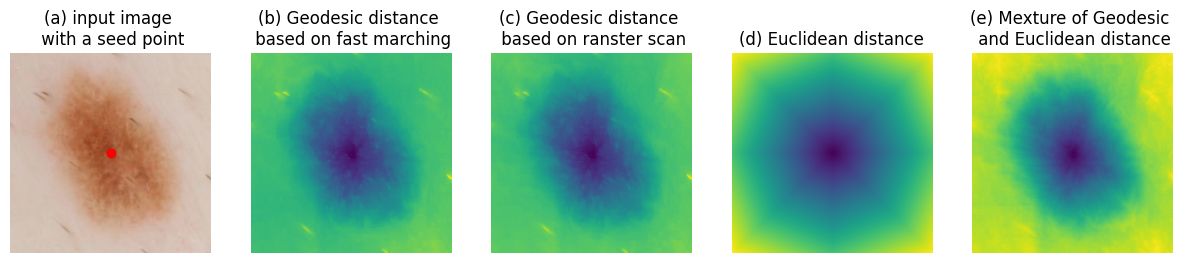

In [7]:
import GeodisTK
import numpy as np
import time
from PIL import Image
import matplotlib.pyplot as plt


def geodesic_distance_2d(I, S, lamb, iter):
    '''
    get 2d geodesic disntance by raser scanning.
    I: input image, can have multiple channels. Type should be np.float32.
    S: binary image where non-zero pixels are used as seeds. Type should be np.uint8.
    lamb: weighting betwween 0.0 and 1.0
          if lamb==0.0, return spatial euclidean distance without considering gradient
          if lamb==1.0, the distance is based on gradient only without using spatial distance
    iter: number of iteration for raster scanning.
    '''
    return GeodisTK.geodesic2d_raster_scan(I, S, lamb, iter)

def demo_geodesic_distance2d(img, seed_pos):
    I = np.asanyarray(img, np.float32)
    S = np.zeros((I.shape[0], I.shape[1]), np.uint8)
    S[seed_pos[0]][seed_pos[1]] = 1
    t0 = time.time()
    D1 = GeodisTK.geodesic2d_fast_marching(I,S)
    t1 = time.time()
    D2 = geodesic_distance_2d(I, S, 1.0, 2)
    dt1 = t1 - t0
    dt2 = time.time() - t1
    D3 = geodesic_distance_2d(I, S, 0.0, 2)
    D4 = geodesic_distance_2d(I, S, 0.5, 2)
    print("runtime(s) of fast marching {0:}".format(dt1))
    print("runtime(s) of raster  scan  {0:}".format(dt2))

    plt.figure(figsize=(15,5))
    plt.subplot(1,5,1); plt.imshow(img)
    plt.autoscale(False);  plt.plot([seed_pos[0]], [seed_pos[1]], 'ro')
    plt.axis('off'); plt.title('(a) input image \n with a seed point')

    plt.subplot(1,5,2); plt.imshow(D1)
    plt.axis('off'); plt.title('(b) Geodesic distance \n based on fast marching')

    plt.subplot(1,5,3); plt.imshow(D2)
    plt.axis('off'); plt.title('(c) Geodesic distance \n based on ranster scan')

    plt.subplot(1,5,4); plt.imshow(D3)
    plt.axis('off'); plt.title('(d) Euclidean distance')

    plt.subplot(1,5,5); plt.imshow(D4)
    plt.axis('off'); plt.title('(e) Mexture of Geodesic \n and Euclidean distance')
    plt.show()

def demo_geodesic_distance2d_gray_scale_image():
    img = Image.open('data/img2d.png').convert('L')
    seed_position = [100, 100]
    demo_geodesic_distance2d(img, seed_position)

def demo_geodesic_distance2d_RGB_image():
    img = Image.open('data/ISIC_546.jpg')
    seed_position = [128, 128]
    demo_geodesic_distance2d(img, seed_position)

if __name__ == '__main__':
    print("example list")
    print(" 0 -- example for gray scale image")
    demo_geodesic_distance2d_gray_scale_image()
    print(" 1 -- example for RB image")
    demo_geodesic_distance2d_RGB_image()

## Run python demo3d.py

In [8]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 15.6 MB/s eta 0:00:00


runtime(s) fast marching 59.03301239013672
runtime(s) raster scan   0.5136501789093018


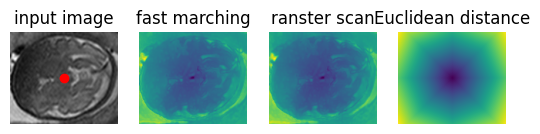

In [9]:
import GeodisTK
import time
import psutil
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from PIL import Image

def geodesic_distance_3d(I, S, spacing, lamb, iter):
    '''
    Get 3D geodesic disntance by raser scanning.
    I: input image array, can have multiple channels, with shape [D, H, W] or [D, H, W, C]
       Type should be np.float32.
    S: binary image where non-zero pixels are used as seeds, with shape [D, H, W]
       Type should be np.uint8.
    spacing: a tuple of float numbers for pixel spacing along D, H and W dimensions respectively.
    lamb: weighting betwween 0.0 and 1.0
          if lamb==0.0, return spatial euclidean distance without considering gradient
          if lamb==1.0, the distance is based on gradient only without using spatial distance
    iter: number of iteration for raster scanning.
    '''
    return GeodisTK.geodesic3d_raster_scan(I, S, spacing, lamb, iter)

def demo_geodesic_distance3d():
    input_name = "data/img3d.nii.gz"
    img = sitk.ReadImage(input_name)
    I   = sitk.GetArrayFromImage(img)
    spacing_raw = img.GetSpacing()
    spacing = [spacing_raw[2], spacing_raw[1],spacing_raw[0]]
    I = np.asarray(I, np.float32)
    I = I[18:38, 63:183, 93:233 ]
    S = np.zeros_like(I, np.uint8)
    S[10][60][70] = 1
    t0 = time.time()
    D1 = GeodisTK.geodesic3d_fast_marching(I,S, spacing)
    t1 = time.time()
    D2 = geodesic_distance_3d(I,S, spacing, 1.0, 4)
    dt1 = t1 - t0
    dt2 = time.time() - t1
    D3 = geodesic_distance_3d(I,S, spacing, 0.0, 4)
    print("runtime(s) fast marching {0:}".format(dt1))
    print("runtime(s) raster scan   {0:}".format(dt2))

    img_d1 = sitk.GetImageFromArray(D1)
    img_d1.SetSpacing(spacing_raw)
    sitk.WriteImage(img_d1, "data/image3d_dis1.nii.gz")

    img_d2 = sitk.GetImageFromArray(D2)
    img_d2.SetSpacing(spacing_raw)
    sitk.WriteImage(img_d2, "data/image3d_dis2.nii.gz")

    img_d3 = sitk.GetImageFromArray(D3)
    img_d3.SetSpacing(spacing_raw)
    sitk.WriteImage(img_d3, "data/image3d_dis3.nii.gz")

    I_sub = sitk.GetImageFromArray(I)
    I_sub.SetSpacing(spacing_raw)
    sitk.WriteImage(I_sub, "data/image3d_sub.nii.gz")

    I = I*255/I.max()
    I = np.asarray(I, np.uint8)

    I_slice = I[10]
    D1_slice = D1[10]
    D2_slice = D2[10]
    D3_slice = D3[10]
    plt.subplot(1,4,1); plt.imshow(I_slice, cmap='gray')
    plt.autoscale(False);  plt.plot([70], [60], 'ro')
    plt.axis('off'); plt.title('input image')

    plt.subplot(1,4,2); plt.imshow(D1_slice)
    plt.axis('off'); plt.title('fast marching')

    plt.subplot(1,4,3); plt.imshow(D2_slice)
    plt.axis('off'); plt.title('ranster scan')

    plt.subplot(1,4,4); plt.imshow(D3_slice)
    plt.axis('off'); plt.title('Euclidean distance')
    plt.show()

if __name__ == '__main__':
    demo_geodesic_distance3d()